In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

%matplotlib inline

In [3]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [21]:
useful_features = ["Level"]
target = ["Salary"]
# X = dataset[useful_features]
# y = dataset[target]
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values



In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y=sc_y.fit_transform(y.reshape(-1,1))

In [34]:
SVR_regressor = SVR(kernel='rbf')
SVR_regressor.fit(X,y)

/home/ritesh/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [40]:
y_pred = SVR_regressor.predict(sc_X.fit_transform(np.array([6.5]).reshape(-1,1)))
y_pred

array([-0.41686141])

Text(0, 0.5, 'Salary')

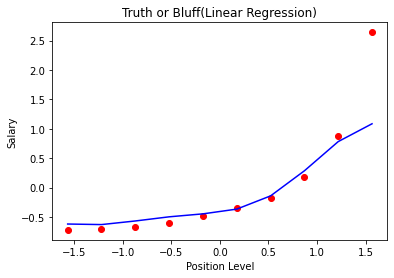

In [36]:
plt.scatter(X,y, color = 'red')
plt.plot(X,SVR_regressor.predict(X),color="blue")
plt.title("Truth or Bluff(Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")